# you can download dataset from --> https://zenodo.org/records/5226945

In [63]:
# extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/cats_dogs_light.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [64]:
import os
# Counting the number of files in train folder
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(f"number of image in train folder:{file_count}")

number of image in train folder:1000


In [65]:
file_names = os.listdir('/content/train')
print(file_names[:10])

['dog.10285.jpg', 'dog.9989.jpg', 'cat.10300.jpg', 'cat.102.jpg', 'cat.10081.jpg', 'dog.10419.jpg', 'dog.1020.jpg', 'cat.10004.jpg', 'cat.10067.jpg', 'dog.10094.jpg']


In [66]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
!pip install opencv-python
from google.colab.patches import cv2_imshow

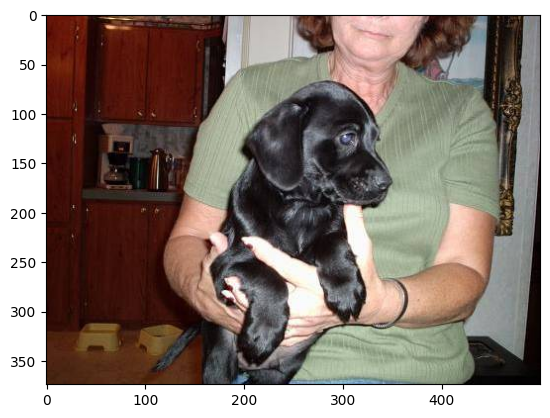

In [67]:
# Displaying the dog image
img = mpimg.imread('/content/train/dog.10065.jpg')
imgplt = plt.imshow(img)
plt.show()


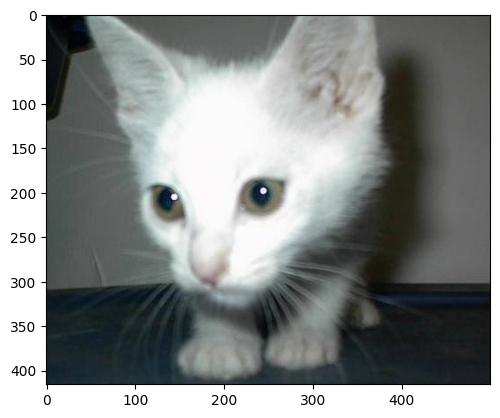

In [68]:
# Displaying the cat image
img = mpimg.imread('/content/train/cat.10159.jpg')
imgplt = plt.imshow(img)
plt.show()

In [69]:
file_names = os.listdir('/content/train') # take out the train,test folder from cats_dog_light folder and drop the folder outside and then run this cell
dog_count = 0
cat_count = 0
for img_file in file_names:
  name = img_file[:3]
  if name == 'dog':
    dog_count+=1
  else:
    cat_count+=1
print('Number of dog image:',dog_count)
print('Number of cat image:',cat_count)

Number of dog image: 545
Number of cat image: 455


In [70]:
# Creating a directory for resized images
original_folder = '/content/train/'
resized_folder = '/content/image_resized/' # make a folder named image_resized before running
for i in range(1000):
  filename = os.listdir(original_folder)[i]
  img_path =original_folder+filename
  img = Image.open(img_path) # image is opening the image in train folder and storing them to img
  img = img.resize((224,224))
  img = img.convert('RGB') # IT TELL THAT IMAGE IS COLOURED

  newimg_path = resized_folder+filename
  img.save(newimg_path)

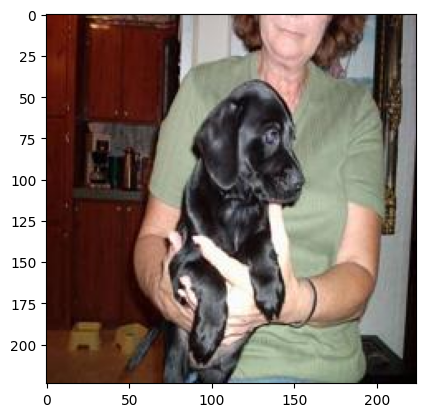

In [71]:
# Displaying resized dog image
img = mpimg.imread('/content/image_resized/dog.10065.jpg')
imgplt = plt.imshow(img)
plt.show()

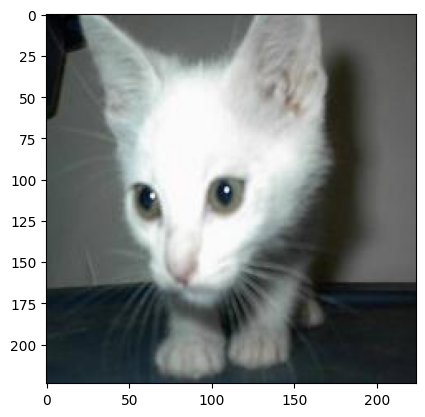

In [72]:
# Displaying resized cat image
img = mpimg.imread('/content/image_resized/cat.10159.jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating for loop to assign label**
1. Dog--> 1
2. Cat-->0

In [73]:
filenames = os.listdir('/content/image_resized/')
labels =[]
for i in range(1000):
  file_name = filenames[i]
  label = file_name[:3]
  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)


In [74]:
print(filenames[:5])
print(len(filenames))
print(labels[:5])
print(len(labels))


['dog.10285.jpg', 'dog.9989.jpg', 'cat.10300.jpg', 'cat.102.jpg', 'cat.10081.jpg']
1000
[1, 1, 0, 0, 0]
1000


In [75]:
# Counting number of dogs and cats in 1000 images
values,counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[455 545]


In [76]:
# Converting all the resized images to numpy array
import cv2
import glob

In [77]:
image_dir = '/content/image_resized/'
image_ext = ['png','jpg'] # the extension in dataset can be of png or jpg
files=[]
[files.extend(glob.glob(image_dir+'*.'+e))for e in image_ext] # glob.glob is locating image and extend is extending the list
dog_cat_images = np.asarray([cv2.imread(file) for file in files]) # asarray will include all array read by cv2 into a single majpor array(1 dimensional array)

In [78]:
print(dog_cat_images)

[[[[ 13  33  20]
   [ 18  38  25]
   [ 13  36  22]
   ...
   [ 20  42  24]
   [ 24  48  30]
   [ 16  42  24]]

  [[ 29  52  38]
   [ 28  53  39]
   [ 21  46  32]
   ...
   [ 15  39  21]
   [ 17  43  25]
   [ 13  41  22]]

  [[ 52  81  66]
   [ 47  76  61]
   [ 34  63  48]
   ...
   [  6  32  16]
   [  7  34  18]
   [  6  35  19]]

  ...

  [[ 69 115 122]
   [114 160 167]
   [ 82 129 133]
   ...
   [ 41 108  93]
   [ 52 119 104]
   [ 68 135 120]]

  [[ 57 104 112]
   [ 82 130 136]
   [ 76 124 128]
   ...
   [ 27  94  79]
   [ 52 119 104]
   [ 46 113  98]]

  [[ 32  79  87]
   [ 20  68  74]
   [ 27  75  81]
   ...
   [ 38 105  90]
   [ 61 128 113]
   [ 55 122 107]]]


 [[[  6   4  10]
   [  6   4  10]
   [  6   4  10]
   ...
   [166 181 190]
   [167 182 191]
   [165 180 189]]

  [[  6   4  10]
   [  6   4  10]
   [  6   4  10]
   ...
   [167 182 191]
   [168 183 192]
   [166 181 190]]

  [[  6   4  10]
   [  6   4  10]
   [  6   4  10]
   ...
   [167 182 191]
   [168 183 192]
   [168 183

In [79]:
type(dog_cat_images)

numpy.ndarray

In [80]:
print(dog_cat_images.shape)

(1000, 224, 224, 3)


In [81]:
x= dog_cat_images
y=np.asarray(labels) # converting python list to numpy array for faster processing

In [82]:
y

array([1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,

# Train Test Split

In [83]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

In [84]:
print(x.shape,x_train.shape,x_test.shape)

(1000, 224, 224, 3) (800, 224, 224, 3) (200, 224, 224, 3)


1.  800 -- training images
2.  200 -- testing images

In [85]:
# scaling the data
x_train_scaled =x_train/255
x_test_scaled =x_test/255

In [86]:
print(x_train_scaled)

[[[[0.27843137 0.32156863 0.42745098]
   [0.27843137 0.32156863 0.42745098]
   [0.27843137 0.32156863 0.42745098]
   ...
   [0.24313725 0.29411765 0.38039216]
   [0.23921569 0.29019608 0.37647059]
   [0.23529412 0.28627451 0.37254902]]

  [[0.28235294 0.3254902  0.43137255]
   [0.28235294 0.3254902  0.43137255]
   [0.28235294 0.3254902  0.43137255]
   ...
   [0.24313725 0.29411765 0.38039216]
   [0.23921569 0.29019608 0.37647059]
   [0.23529412 0.28627451 0.37254902]]

  [[0.28627451 0.32941176 0.43529412]
   [0.29019608 0.33333333 0.43921569]
   [0.29019608 0.33333333 0.43921569]
   ...
   [0.24313725 0.29411765 0.38039216]
   [0.23921569 0.29019608 0.37647059]
   [0.23529412 0.28627451 0.37254902]]

  ...

  [[0.09803922 0.11372549 0.11764706]
   [0.09803922 0.11372549 0.11764706]
   [0.09411765 0.10980392 0.11372549]
   ...
   [0.29803922 0.29803922 0.29803922]
   [0.30588235 0.30588235 0.30588235]
   [0.30980392 0.30980392 0.30980392]]

  [[0.09803922 0.11372549 0.11764706]
   [0.0

**Building the Neural Network**

In [87]:
!pip install tensorflow
!pip install tensorflow_hub
!pip install --upgrade tensorflow tensorflow_hub
import tensorflow as tf
import tensorflow_hub as hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 32.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.5/615.5 MB 1.5 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tensorflow 2.18.1 which is incompatible.


In [88]:
mobilenet_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4"
pretrained_model = hub.KerasLayer(mobilenet_model,input_shape=(224,224,3),trainable=False) # false tells wheather the layer is trainable or not

In [89]:
print("TensorFlow Version:", tf.__version__)
print("TensorFlow Hub Version:", hub.__version__)

TensorFlow Version: 2.18.0
TensorFlow Hub Version: 0.16.1


In [90]:
!pip install tf_keras
import tf_keras  # in colab environment, tf_keras instead of tf.keras ,means tf_keras.Sequential instead of tf.keras.Sequential


num_of_classes = 2

model = tf_keras.Sequential([

    pretrained_model,
    tf_keras.layers.Dense(num_of_classes)

])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              3540265   
                                                                 
 dense (Dense)               (None, 2)                 2004      
                                                                 
Total params: 3542269 (13.51 MB)
Trainable params: 2004 (7.83 KB)
Non-trainable params: 3540265 (13.51 MB)
_________________________________________________________________


In [91]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [92]:
history = model.fit(x_train_scaled, y_train, epochs=5,validation_split =0.2)

Epoch 1/5
20/20 [==============================] - 67s 3s/step - loss: 0.3191 - accuracy: 0.8781 - val_loss: 0.1633 - val_accuracy: 0.9563
Epoch 2/5
20/20 [==============================] - 50s 3s/step - loss: 0.0755 - accuracy: 0.9672 - val_loss: 0.1418 - val_accuracy: 0.9688
Epoch 3/5
20/20 [==============================] - 41s 2s/step - loss: 0.0412 - accuracy: 0.9906 - val_loss: 0.1332 - val_accuracy: 0.9625
Epoch 4/5
20/20 [==============================] - 33s 2s/step - loss: 0.0271 - accuracy: 0.9984 - val_loss: 0.1508 - val_accuracy: 0.9563
Epoch 5/5
20/20 [==============================] - 43s 2s/step - loss: 0.0200 - accuracy: 1.0000 - val_loss: 0.1407 - val_accuracy: 0.9563


In [93]:
y_prob = model.predict(x_test_scaled)

7/7 [==============================] - 10s 1s/step


In [94]:
yp = y_prob.argmax(axis=1)


In [95]:
yp

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0])

In [96]:

from sklearn.metrics import accuracy_score
accuracy_score(y_test,yp)

0.965

Classification Model Prediction

In [ ]:
# predicting for downloaded image from website
path = input("Enter the path of downloaded image ")
img1 = Image.open(path) # Image is opening the image
img1 = img1.resize((224,224))
img1 = img1.convert('RGB')
img1 = np.array(img1)
y_p = model.predict(img1)
y_predicted = y_p.argmax(axis=1)
print(y_predicted)